<a href="https://colab.research.google.com/github/yuhyerin/AI/blob/master/day2_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch를 이용한 머신러닝

Google의 Tensorflow
Facebook의 PyTorch

Why PyTorch?
 - Can check values while running
 - Easy deployment to C++
 - Performance
 - Researchers prefer PyTorch to Tensorflow



## PyTorch Fundamentals

Tensor
 - 텐서는 다차원 배열을 처리하기 위한 데이터 구조이다.
 - Numpy의 ndarray(n dimensional array)와 거의 같은 API를 지니고 있다.
 - GPU를 사용한 계산도 지원한다.
   (Numpy의 ndarray는 GPU를 사용하기가 어렵지만, Tensor는 GPU로 빠르게 처리가 가능하다.)
 - 텐서는 각 데이터형별로 정의돼 있다.
 - GPU상에서 계산할 때는 torch.cuda.FloatTensor 등을 사용한다.
 - Tensor는 FloatTensor의 별칭(alias)이다.
 - 어떤 형의 텐서이건 torch.tensor라는 함수로 작성할 수 있다.

## PyTorch의 기본

PyTorch는 원래 C++에 있던 Torch를 Python에서 쓸 수 있도록 한 것.

In [0]:
import torch
t = torch.tensor([[1., 2.], [3., 4.]])
print(t)

tensor([[1., 2.],
        [3., 4.]])




---


device="cuda:0"를 명시해 주어야만 텐서가 GPU에 할당된다.

In [0]:
t = torch.tensor([[1., 2.], [3., 4.]], device="cuda:0")
print(t)

tensor([[1., 2.],
        [3., 4.]], device='cuda:0')




---


torch.tensor의 기본 데이터 타입은 float32이다.<br>
dtype=torch.float64를 따로 명시해 주어야만 64bit float로 텐서가 생성된다.

In [0]:
t = torch.tensor([[1., 2.], [3., 4.]], dtype=torch.float64)
print(t)

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)




---


0부터 9까지의 정수로 이루어진 1차원 Tensor

In [0]:
t = torch.arange(0, 10)
print(t)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])




---

모든 값이 0인 100x10의 Tensor를 GPU에서 생성
두 코드는 같은 동작을 한다.

In [0]:
t = torch.zeros(100, 10).to("cuda:0")
t = torch.zeros((100, 10), device="cuda:0")

print(t)



---


정규분포를 따르는 난수로 100x10의 Tensor를 생성

In [0]:
t = torch.randn(100, 10)
print(t)

tensor([[ 1.7140e-01, -1.0880e+00,  5.3741e-02, -1.6216e-01,  3.5411e-01,
          8.8906e-01, -1.9573e+00,  8.8121e-01,  3.5016e-01, -2.5917e-01],
        [-3.4835e-01,  2.1276e+00,  1.1517e+00,  1.2675e+00, -1.0220e+00,
          1.1052e+00,  2.0641e-01,  2.7981e+00, -1.1195e+00, -1.4853e-01],
        [-7.9030e-01,  6.0993e-01, -8.8410e-01,  3.8178e-01,  1.5034e+00,
         -1.3742e+00,  3.9295e-01,  6.0804e-01,  4.8383e-01, -6.6233e-01],
        [ 1.5993e+00, -2.1546e-01,  3.6316e-01,  4.9823e-01, -1.1279e+00,
         -1.5876e+00,  1.0657e+00,  6.3706e-01,  3.8041e-01,  1.3199e-01],
        [-1.0146e+00, -1.1015e+00,  1.3256e+00,  1.4621e+00, -1.7124e+00,
         -1.3427e+00,  1.9111e-01, -7.4934e-01,  3.3116e-01, -1.1926e+00],
        [-7.5445e-01, -4.3875e-01, -5.0018e-01, -1.5051e+00,  2.6851e-01,
          8.0480e-01, -1.1924e+00, -6.3061e-01,  6.9565e-01,  1.7205e-01],
        [ 1.2979e+00,  7.8025e-01,  6.9140e-01, -1.1858e+00, -1.4414e+00,
         -6.5024e-01, -1.2877e+0



---


Tensor의 shape는 size 메서드로 확인할 수 있다.

In [0]:
t.size()

torch.Size([100, 10])



---


!nvidia-smi 명령어로 GPU 정보를 확인할 수 있다.

In [0]:
!nvidia-smi

Tue Aug 27 00:40:01 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    72W / 149W |    337MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## Torch tensor와 Numpy ndarray간의 변환

numpy 메서드를 사용해 ndarray로 변환

In [0]:
import torch
import numpy

t = torch.tensor([[1., 2.], [3., 4.]])
x = t.numpy()

print(x)

[[1. 2.]
 [3. 4.]]




---


GPU에 할당된 tensor를 numpy ndarray로 변환하기 위해서는 반드시 CPU로 옮긴 뒤 변환해야 한다.

In [0]:
t = torch.tensor([[1., 2.], [3., 4.]], device="cuda:0")
x = t.to("cpu").numpy()

print(x)

[[1. 2.]
 [3. 4.]]




---

CPU로 이동시키지 않고 GPU에 할당된 Tensor를 ndarray로 변환하려 할 경우 에러가 발생한다.

In [0]:
t = torch.tensor([[1., 2.], [3., 4.]], device="cuda:0")
x = t.numpy()

print(x)

TypeError: ignored

## Tensor의 인덱스 조작

스칼라 첨자 지정

In [0]:
t = torch.tensor([[1., 2., 3.], [4., 5., 6.]])
t[0, 2]

tensor(3.)



---


슬라이스로 지정

In [0]:
t[:, :2]

tensor([[1., 2.],
        [4., 5.]])



---


리스트로 지정

In [0]:
t[:, [1,2]]

tensor([[2., 3.],
        [5., 6.]])



---


마스크 배열을 사용해서 3보다 큰 부분만 선택

In [0]:
t[t > 3]

tensor([4., 5., 6.])

t[t > 3]은 아래와 같은 mask를 생성한다.<br>
[[F, F, F]<br>
 [T, T, T]]



---

특정 조건의 요소 선택 예시

In [0]:
t = torch.tensor([[1., 2., 3., 7., 8., 9.], [4., 5., 6., 1., 2., 3.]])
t[t > 3]

tensor([7., 8., 9., 4., 5., 6.])



---


[0, 1]의 요소를 100으로 설정

In [0]:
t = torch.tensor([[1., 2., 3.], [4., 5., 6.]])
t[0, 1] = 100
print(t)

tensor([[  1., 100.,   3.],
        [  4.,   5.,   6.]])




---


슬라이스를 사용한 일괄 대입

In [0]:
t[:, 1] = 200
print(t)

tensor([[  1., 200.,   3.],
        [  4., 200.,   6.]])




---


마스크 배열을 사용해서 특정 조건의 요소만 치환

In [0]:
t[t > 10] = 20
print(t)

tensor([[ 1., 20.,  3.],
        [ 4., 20.,  6.]])


# Tensor 연산

scalar: <br>
vector: 1차원<br>
matrix: 2차원<br>
tensor: 3차원

In [0]:
v = torch.tensor([1., 2., 3.])
w = torch.tensor([0., 10., 20.])
m = torch.tensor([[0., 1., 2.,], [100., 200., 300.]])



---


벡터와 스칼라의 덧셈

In [0]:
v2 = v + 10
print(v2)

tensor([11., 12., 13.])




---

벡터와 스칼라의 제곱

In [0]:
v2 = v ** 2
print(v2)

tensor([1., 4., 9.])




---


동일한 길이의 벡터 간 뺄셈

In [0]:
z = v - w
print(z)

tensor([  1.,  -8., -17.])




---


여러 가지 조합

In [0]:
u = 2 * v - w / 10 + 6.0
print(u)

tensor([ 8.,  9., 10.])




---

행렬과 스칼라의 곱

In [0]:
m2 = m * 2.0
print(m2)

tensor([[  0.,   2.,   4.],
        [200., 400., 600.]])




---


(2, 3)인 행렬과 (3,)인 벡터의 덧셈이므로 각 행에 적용된다.<br>
Ref. numpy's broadcasting

In [0]:
m3 = m + v
print(m3)

tensor([[  1.,   3.,   5.],
        [101., 202., 303.]])




---


행렬간 덧셈

In [0]:
m4 = m + m
print(m4)

tensor([[  0.,   2.,   4.],
        [200., 400., 600.]])


# 행렬 Tensor의 인덱스 조작 View

In [2]:
import torch
x1 = torch.tensor( [ [1,2], [3,4]]) #2x2
x2 = torch.tensor( [ [10,20,30], [40,50,60]]) # 2x3
x1.view(4,1) # 차원을 바꿔준다.

tensor([[1],
        [2],
        [3],
        [4]])

In [3]:
x1.view(1, -1) # -1을 사용하면 표현할수 있는 자동화된 값으로 대체

tensor([[1, 2, 3, 4]])

In [4]:
x2.t() # 2x3을 전치해서 3x2로 마꾼다.

tensor([[10, 40],
        [20, 50],
        [30, 60]])

cat : concatinate (결합한다, 붙인다)

In [5]:
torch.cat([x1, x2], dim=1) # dim=1은 열방향으로 붙인다. 

tensor([[ 1,  2, 10, 20, 30],
        [ 3,  4, 40, 50, 60]])

In [10]:
# 100장의 사진, 높이:64, 폭:32, 채널:3(컬러)
hwc_img_data = torch.rand(100, 64, 32, 3) # 위치 인덱스 : (0,1,2,3)

# 파이토치가 읽어들일 수 있는 형태로 바꿔줌... c h w 순서
chw_img_data = hwc_img_data.transpose(1,2).transpose(1,3) #transpose(1,2)= 64와 32를 바꾸라는 소리. transpose(1,3) = 32와 3을 바꾸라는 소리.
#print(hwc_img_data.size()) 
print(chw_img_data.size())

torch.Size([100, 3, 64, 32])


# 선형대수의 연산자

In [11]:
# 벡터의 내적 : dot

v=torch.arange(0,10)
d=torch.dot(v,v)
print(v)
print(d)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor(285)


In [16]:
# 행렬과 벡터의 곱 : mv ( torch가 알아서 형태를 바꿔줌 )

m= torch.randn(100,10)
v= torch.randn(10)

v2=torch.mv(m,v) 
print(v2.size())
print(v2) # 길이 100인 벡터.

torch.Size([100])
tensor([ 1.2983e+00,  2.9549e+00,  2.5230e+00, -3.5263e-01, -9.7770e-02,
        -6.2606e+00,  6.3779e-01, -1.2869e+00, -6.2717e+00, -7.6933e-01,
         6.1201e+00, -1.8359e-01, -2.1851e+00, -1.2779e+00,  2.2889e+00,
        -5.2962e+00, -2.8497e+00, -7.3735e+00, -6.6909e+00, -9.1120e-01,
        -4.5857e+00,  3.3836e+00,  2.6896e+00,  3.0207e+00, -2.4532e+00,
         8.9093e-01,  5.0170e-01, -9.9598e-01,  2.2822e+00,  3.8196e+00,
        -3.2575e-01,  8.4739e-01,  3.5349e+00,  1.8139e+00,  5.2424e+00,
        -1.7025e-01, -5.0041e+00, -1.2399e-02,  1.8765e+00, -1.4293e-01,
        -4.5077e+00,  1.5862e+00, -9.6675e-02,  1.6492e+00, -2.1309e+00,
         4.7277e-01,  2.6522e+00,  2.4873e+00, -4.0861e-01,  6.6320e-01,
         3.2721e+00,  1.2149e+00,  5.1344e+00, -1.5325e+00, -3.5642e+00,
        -5.4125e+00, -1.4279e+00,  1.9108e+00,  1.3238e+00, -1.4144e+00,
        -2.8370e+00,  4.3644e+00,  3.5676e+00, -3.9323e+00,  1.6137e+00,
        -2.6169e-01,  5.9839e-03,

In [15]:
# 행렬과 행렬의 곱 : mm
m2= torch.mm(m.t(), m) # m.t : 10x 100 m: 100x10 
print(m2.size())
print(m2) # 결과: 10x10

torch.Size([10, 10])
tensor([[ 95.5386,  -1.1604,  -3.5680, -16.2073,  -2.9715,   8.9280,  -3.0956,
          -2.2672,   8.0219,  17.6243],
        [ -1.1604,  93.7582,  -7.9152,  -0.9966,  12.1934,  11.5748,  10.5326,
           6.0529, -11.7135,  -3.5939],
        [ -3.5680,  -7.9152,  93.6152,  -6.3904,  -9.3985,  -2.0026,  -3.2682,
          -6.7145,   7.0079,  10.4870],
        [-16.2073,  -0.9966,  -6.3904, 113.2977,  15.0317, -10.5391,   6.2173,
           8.4778,  -6.9978,  -8.1579],
        [ -2.9715,  12.1934,  -9.3985,  15.0317, 109.2771,   1.2019,  -1.8892,
           8.6400,   1.9562,  -4.3676],
        [  8.9280,  11.5748,  -2.0026, -10.5391,   1.2019,  92.7023, -11.5561,
           4.7901, -17.9003,   3.1842],
        [ -3.0956,  10.5326,  -3.2682,   6.2173,  -1.8892, -11.5561,  71.1111,
          10.1025,  -5.5877, -10.8938],
        [ -2.2672,   6.0529,  -6.7145,   8.4778,   8.6400,   4.7901,  10.1025,
          94.5828, -19.6040, -11.9132],
        [  8.0219, -11.7135

In [18]:
# 특이값 분해, Singular Value Decomposition # 영상에서 특징을 뽑아냄, 긴장문의 글에서 요약글을 뽑아냄...

u, s, v = torch.svd(m)
print(u.size())
print(s.size())
print(v.size())

torch.Size([100, 10])
torch.Size([10])
torch.Size([10, 10])


# 선형 회귀 모델 (Linear Regression Model)

In [58]:
# PyTorch로 선형회귀모델 직접 만들기

import torch
import matplotlib.pyplot as plt

basic = torch.ones(13, dtype=torch.float32)
x1_gas = torch.tensor( [0,73,31,39,78,22,96,82,24,81,61,28,91], dtype=torch.float32) #벡터
x2_gas = torch.tensor( [11,88,81,2,73,88,8,64,80,45,67,34,25], dtype=torch.float32) #벡터

toxic = torch.FloatTensor([34, 411, 306, 85, 376, 309, 217, 357, 289, 298, 324, 159, 258])
print(toxic.dtype)

basic = basic.view((-1,1)) # -1은 알아서 만들어줌, 1은 1행을 1열로 세운다.
x1_gas = x1_gas.view((-1,1))
x2_gas = x2_gas.view((-1,1))
X=torch.cat([basic, x1_gas, x2_gas], dim=1) # 13x3 matrix
w=torch.randn(3, requires_grad=True) # 우리가 구해야 할 값! [w1, w2, w3] ,3개값을 , requires_gradient=True 계속 찾아가겠다!

torch.float32


In [59]:
print(w)

tensor([ 2.2738,  0.0734, -1.7024], requires_grad=True)


In [60]:
print(X)
print(X.size())

tensor([[ 1.,  0., 11.],
        [ 1., 73., 88.],
        [ 1., 31., 81.],
        [ 1., 39.,  2.],
        [ 1., 78., 73.],
        [ 1., 22., 88.],
        [ 1., 96.,  8.],
        [ 1., 82., 64.],
        [ 1., 24., 80.],
        [ 1., 81., 45.],
        [ 1., 61., 67.],
        [ 1., 28., 34.],
        [ 1., 91., 25.]])
torch.Size([13, 3])


0 w: tensor([2.2545, 1.9893, 2.9901], requires_grad=True) : 
1 w: tensor([2.2545, 1.9893, 2.9901], requires_grad=True) : 
2 w: tensor([2.2545, 1.9893, 2.9901], requires_grad=True) : 
3 w: tensor([2.2544, 1.9893, 2.9901], requires_grad=True) : 
4 w: tensor([2.2544, 1.9893, 2.9901], requires_grad=True) : 
5 w: tensor([2.2544, 1.9893, 2.9901], requires_grad=True) : 
6 w: tensor([2.2544, 1.9893, 2.9901], requires_grad=True) : 
7 w: tensor([2.2544, 1.9893, 2.9901], requires_grad=True) : 
8 w: tensor([2.2544, 1.9893, 2.9901], requires_grad=True) : 
9 w: tensor([2.2544, 1.9893, 2.9901], requires_grad=True) : 
10 w: tensor([2.2544, 1.9893, 2.9901], requires_grad=True) : 
11 w: tensor([2.2544, 1.9893, 2.9901], requires_grad=True) : 
12 w: tensor([2.2544, 1.9893, 2.9901], requires_grad=True) : 
13 w: tensor([2.2544, 1.9893, 2.9901], requires_grad=True) : 
14 w: tensor([2.2544, 1.9893, 2.9901], requires_grad=True) : 
15 w: tensor([2.2544, 1.9893, 2.9901], requires_grad=True) : 
16 w: tensor([2.25

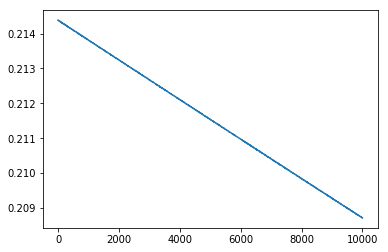

In [66]:
losses = []

for epoch in range(10000):
  
  w.grad= None # 기존의 미분값버리기.
  
  y_pred = torch.mv(X,w) # 예측한 유독성값.
  #print('y_pred : ',y_pred)
  print(f'{epoch} w: {w}')
  loss= torch.mean( (toxic- y_pred)**2)
  loss.backward()
  
  w.data = w.data - 0.000005*w.grad.data
  losses.append(loss.item())
  
print(w)

plt.plot(losses)
plt.show()

# PyTorch로 선형회귀모델 만들기

In [87]:
### PyTorch로 선형회귀모델 만들기

import torch
from torch import nn, optim
import matplotlib.pyplot as plt

basic = torch.ones(13, dtype=torch.float32)
x1_gas = torch.tensor( [0,73,31,39,78,22,96,82,24,81,61,28,91], dtype=torch.float32) #벡터
x2_gas = torch.tensor( [11,88,81,2,73,88,8,64,80,45,67,34,25], dtype=torch.float32) #벡터

toxic = torch.FloatTensor([34, 411, 306, 85, 376, 309, 217, 357, 289, 298, 324, 159, 258])
print(toxic.dtype)

basic = basic.view((-1,1)) # -1은 알아서 만들어줌, 1은 1행을 1열로 세운다.
x1_gas = x1_gas.view((-1,1))
x2_gas = x2_gas.view((-1,1))
X=torch.cat([basic, x1_gas, x2_gas], dim=1) # 13x3 matrix

net = nn.Linear(in_features=3, out_features=1, bias=False) #입력:3 아웃풋:1
optimizer = optim.SGD(net.parameters(), lr=0.001)
loss_fn = nn.MSELoss() # Mean Squared Error


torch.float32


[Parameter containing:
tensor([[nan, nan, nan]], requires_grad=True)]


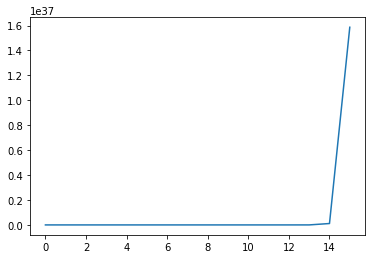

In [88]:
losses =[]

for epoch in range(100000):
  optimizer.zero_grad()
  
  y_pred=net(X)
  loss=loss_fn(y_pred.view_as(toxic), toxic)
  loss.backward()
  
  optimizer.step()
  losses.append(loss.item())
  
print(list(net.parameters()))
plt.plot(losses)
plt.show()

# GPU에서 돌리기

In [95]:
### PyTorch로 선형회귀모델 만들기

import torch
from torch import nn, optim
import matplotlib.pyplot as plt

basic = torch.ones(13, dtype=torch.float32)
x1_gas = torch.tensor( [0,73,31,39,78,22,96,82,24,81,61,28,91], dtype=torch.float32) #벡터
x2_gas = torch.tensor( [11,88,81,2,73,88,8,64,80,45,67,34,25], dtype=torch.float32) #벡터

toxic = torch.FloatTensor([34, 411, 306, 85, 376, 309, 217, 357, 289, 298, 324, 159, 258])
toxic = toxic.to('cuda:0')
print(toxic.dtype)

basic = basic.view((-1,1)) # -1은 알아서 만들어줌, 1은 1행을 1열로 세운다.
x1_gas = x1_gas.view((-1,1))
x2_gas = x2_gas.view((-1,1))
X=torch.cat([basic, x1_gas, x2_gas], dim=1) # 13x3 matrix
X = X.to('cuda:0')

net = nn.Linear(in_features=3, out_features=1, bias=False) #입력:3 아웃풋:1
net.cuda()

optimizer = optim.SGD(net.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

losses =[]

for epoch in range(1000000):
  optimizer.zero_grad()
  
  y_pred=net(X)
  loss=loss_fn(y_pred.view_as(toxic), toxic)
  loss.backward()
  
  optimizer.step()
  losses.append(loss.item())
  
print(list(net.parameters()))
plt.plot(losses)
plt.show()

torch.float32


KeyboardInterrupt: ignored

# 로지스틱 회귀(Logistic Regression) : 얘가 꽃이다! 뭐다! 카테고리를 맞추는거

In [0]:
import torch
from torch import nn,optim
from sklearn.datasets import load_iris
iris= load_iris()

In [0]:
X=iris.data[:100]
y=iris.target[:100]

X= torch.tensor(X, dtype=torch.float32)
y= torch.tensor(y, dtype=torch.float32)

In [0]:
net = nn.Linear(4,1) # iris데이터는 4차원
loss_fn= nn.BCEWithLogitsLoss() # 시그모이드 함수를 적용해서 두 클래스의 분류를 위한 크로스 엔트로피를 계산.
optimizer = optim.SGD(net.parameters(), lr=0.25) #optimizer:왼쪽으로 갈지 오른쪽으로 갈지.

크로스 엔트로피? loss값 구하는 방법중하나.
y: 참값, p:예측값 
-[ylog(p)+(1-y)log(1-p)]

엔트로피값이 0이면 오차가 거의없다. 같다.
오차가 크면 엔트로피값 무한대.

In [0]:
losses= []

for epoch in range(100):
  optimizer.zero_grad()
  y_pred = net(X)
  loss = loss_fn(y_pred.view_as(y), y)
  loss.backward()
  
  optimizer.step()
  
  losses.append(loss.item())

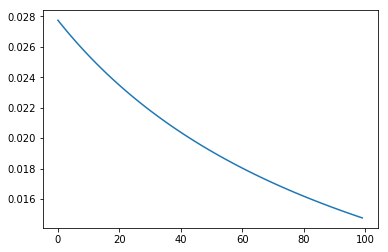

In [104]:
from matplotlib import pyplot as plt
plt.plot(losses)

In [105]:
h= net(X)
prob = torch.sigmoid(h)

y_pred = prob>0.5

(y.byte() == y_pred.view_as(y)).sum().item()

100

# 숫자 손글씨 분류 : 로지스틱회귀

In [129]:
import torch
from torch import nn, optim
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits= load_digits()

X=digits.data
y=digits.target

print(type(X)) 
print('X의 size : ',X.shape) ## (1797, 64)

print(type(y))
print('y의 size : ',y.shape) ## (1797,)
print(y)

for i in range(len(X)):
  num = X[i]
  #print(num.shape)
  num=num.reshape((8,8))
  #print(num.shape)
  #print(num)
  #plt.imshow(num, cmap='gray')
  #plt.show()

<class 'numpy.ndarray'>
X의 size :  (1797, 64)
<class 'numpy.ndarray'>
y의 size :  (1797,)
[0 1 2 ... 8 9 8]


In [127]:
from sklearn.datasets import load_digits

digits = load_digits()

X=digits.data
y=digits.target

X=torch.tensor(X, dtype=torch.float32)
print(X.size())
y=torch.tensor(y, dtype=torch.int64) ## CrossEntropyLoss함수는 y로 int64형 텐서를 받는다.

net=nn.Linear(X.size()[1], 10)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01) # paramters갯수? 64x 10 = 640개!!

print(y.size())

torch.Size([1797, 64])
torch.Size([1797])


In [128]:
losses=[]

for epoch in range(100):
  optimizer.zero_grad() # 미분값 초기화.
  y_pred = net(X) 
  #print(y_pred.view_as(y))
  
  loss=loss_fn(y_pred.view_as(y), y)
  loss.backward()
  
  optimizer.step()
  
  losses.append(loss.item())

RuntimeError: ignored

In [0]:
from matplotlib import pyplot as plt
plt.plot(losses)


In [0]:
_, y_pred = torch.max(net(X),1)
(y_pred == y).sum().item() / len(y)